In [23]:
import pandas as p
d=p.read_csv('Signal.csv')
d.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [2]:
d.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<AxesSubplot:>

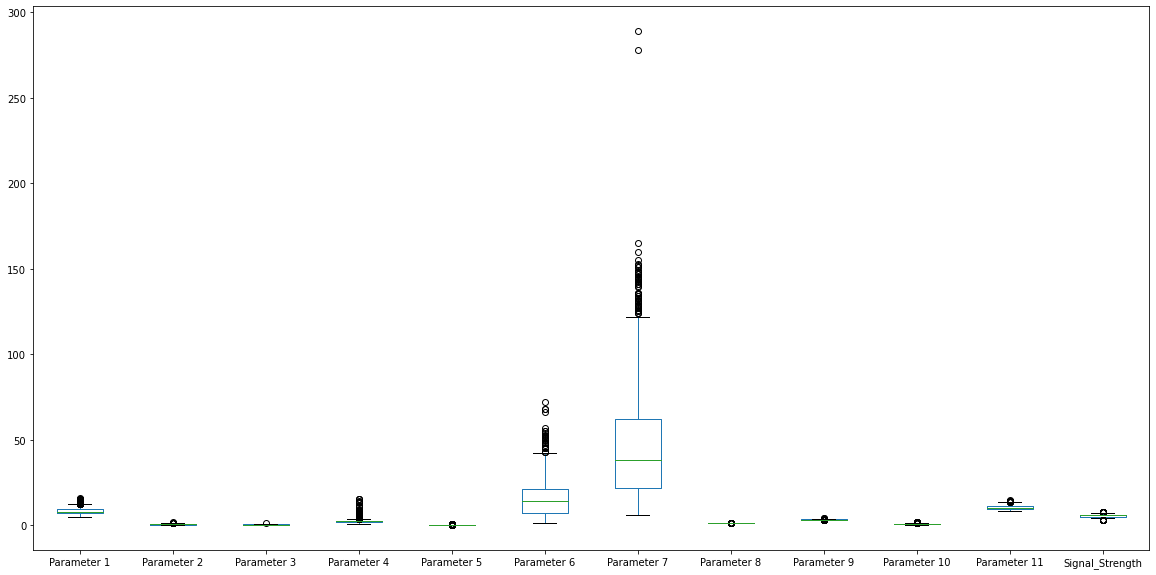

In [3]:
import matplotlib.pyplot as pl
d.plot(kind='box',figsize=(20,10))

In [4]:
d.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [24]:
for i in d.columns[:-1]:
    q1=d[i].quantile(.25)
    q3=d[i].quantile(.75)
    iq=q3-q1
    d.loc[(d[i]<q1-iq*1.5)|(d[i]>q3+iq*1.5),i]=d[i].median()

<AxesSubplot:>

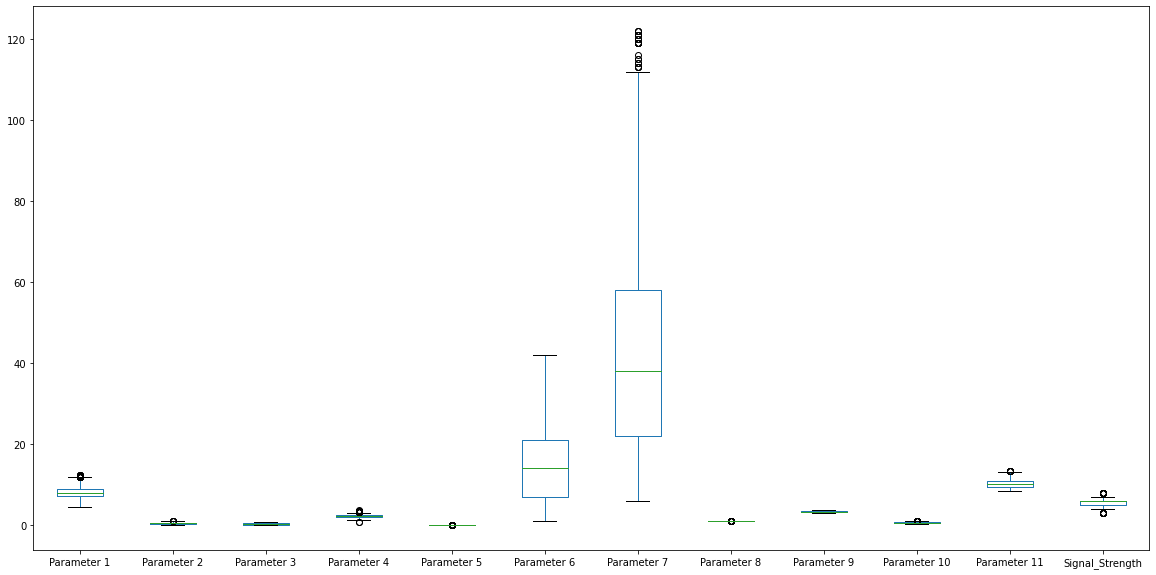

In [7]:
d.plot(kind='box',figsize=(20,10))

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<AxesSubplot:title={'center':'Parameter 1'}>,
        <AxesSubplot:title={'center':'Parameter 2'}>,
        <AxesSubplot:title={'center':'Parameter 3'}>],
       [<AxesSubplot:title={'center':'Parameter 4'}>,
        <AxesSubplot:title={'center':'Parameter 5'}>,
        <AxesSubplot:title={'center':'Parameter 6'}>],
       [<AxesSubplot:title={'center':'Parameter 7'}>,
        <AxesSubplot:title={'center':'Parameter 8'}>,
        <AxesSubplot:title={'center':'Parameter 9'}>],
       [<AxesSubplot:title={'center':'Parameter 10'}>,
        <AxesSubplot:title={'center':'Parameter 11'}>,
        <AxesSubplot:title={'center':'Signal_Strength'}>]], dtype=object)

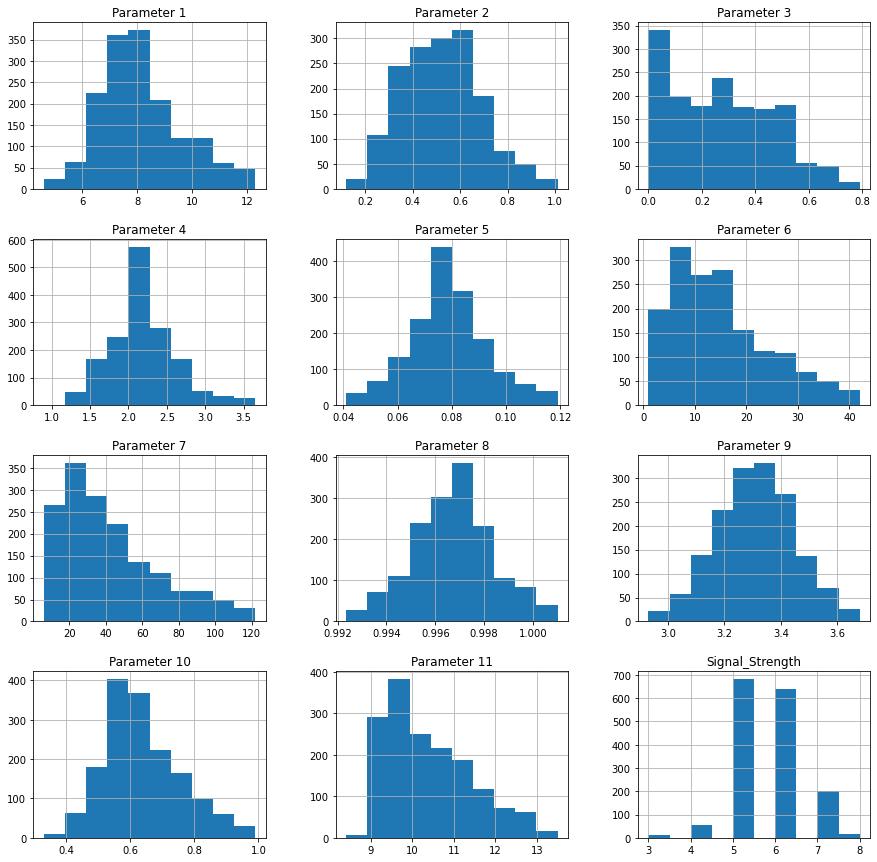

In [10]:
d.hist(figsize=(15,15))

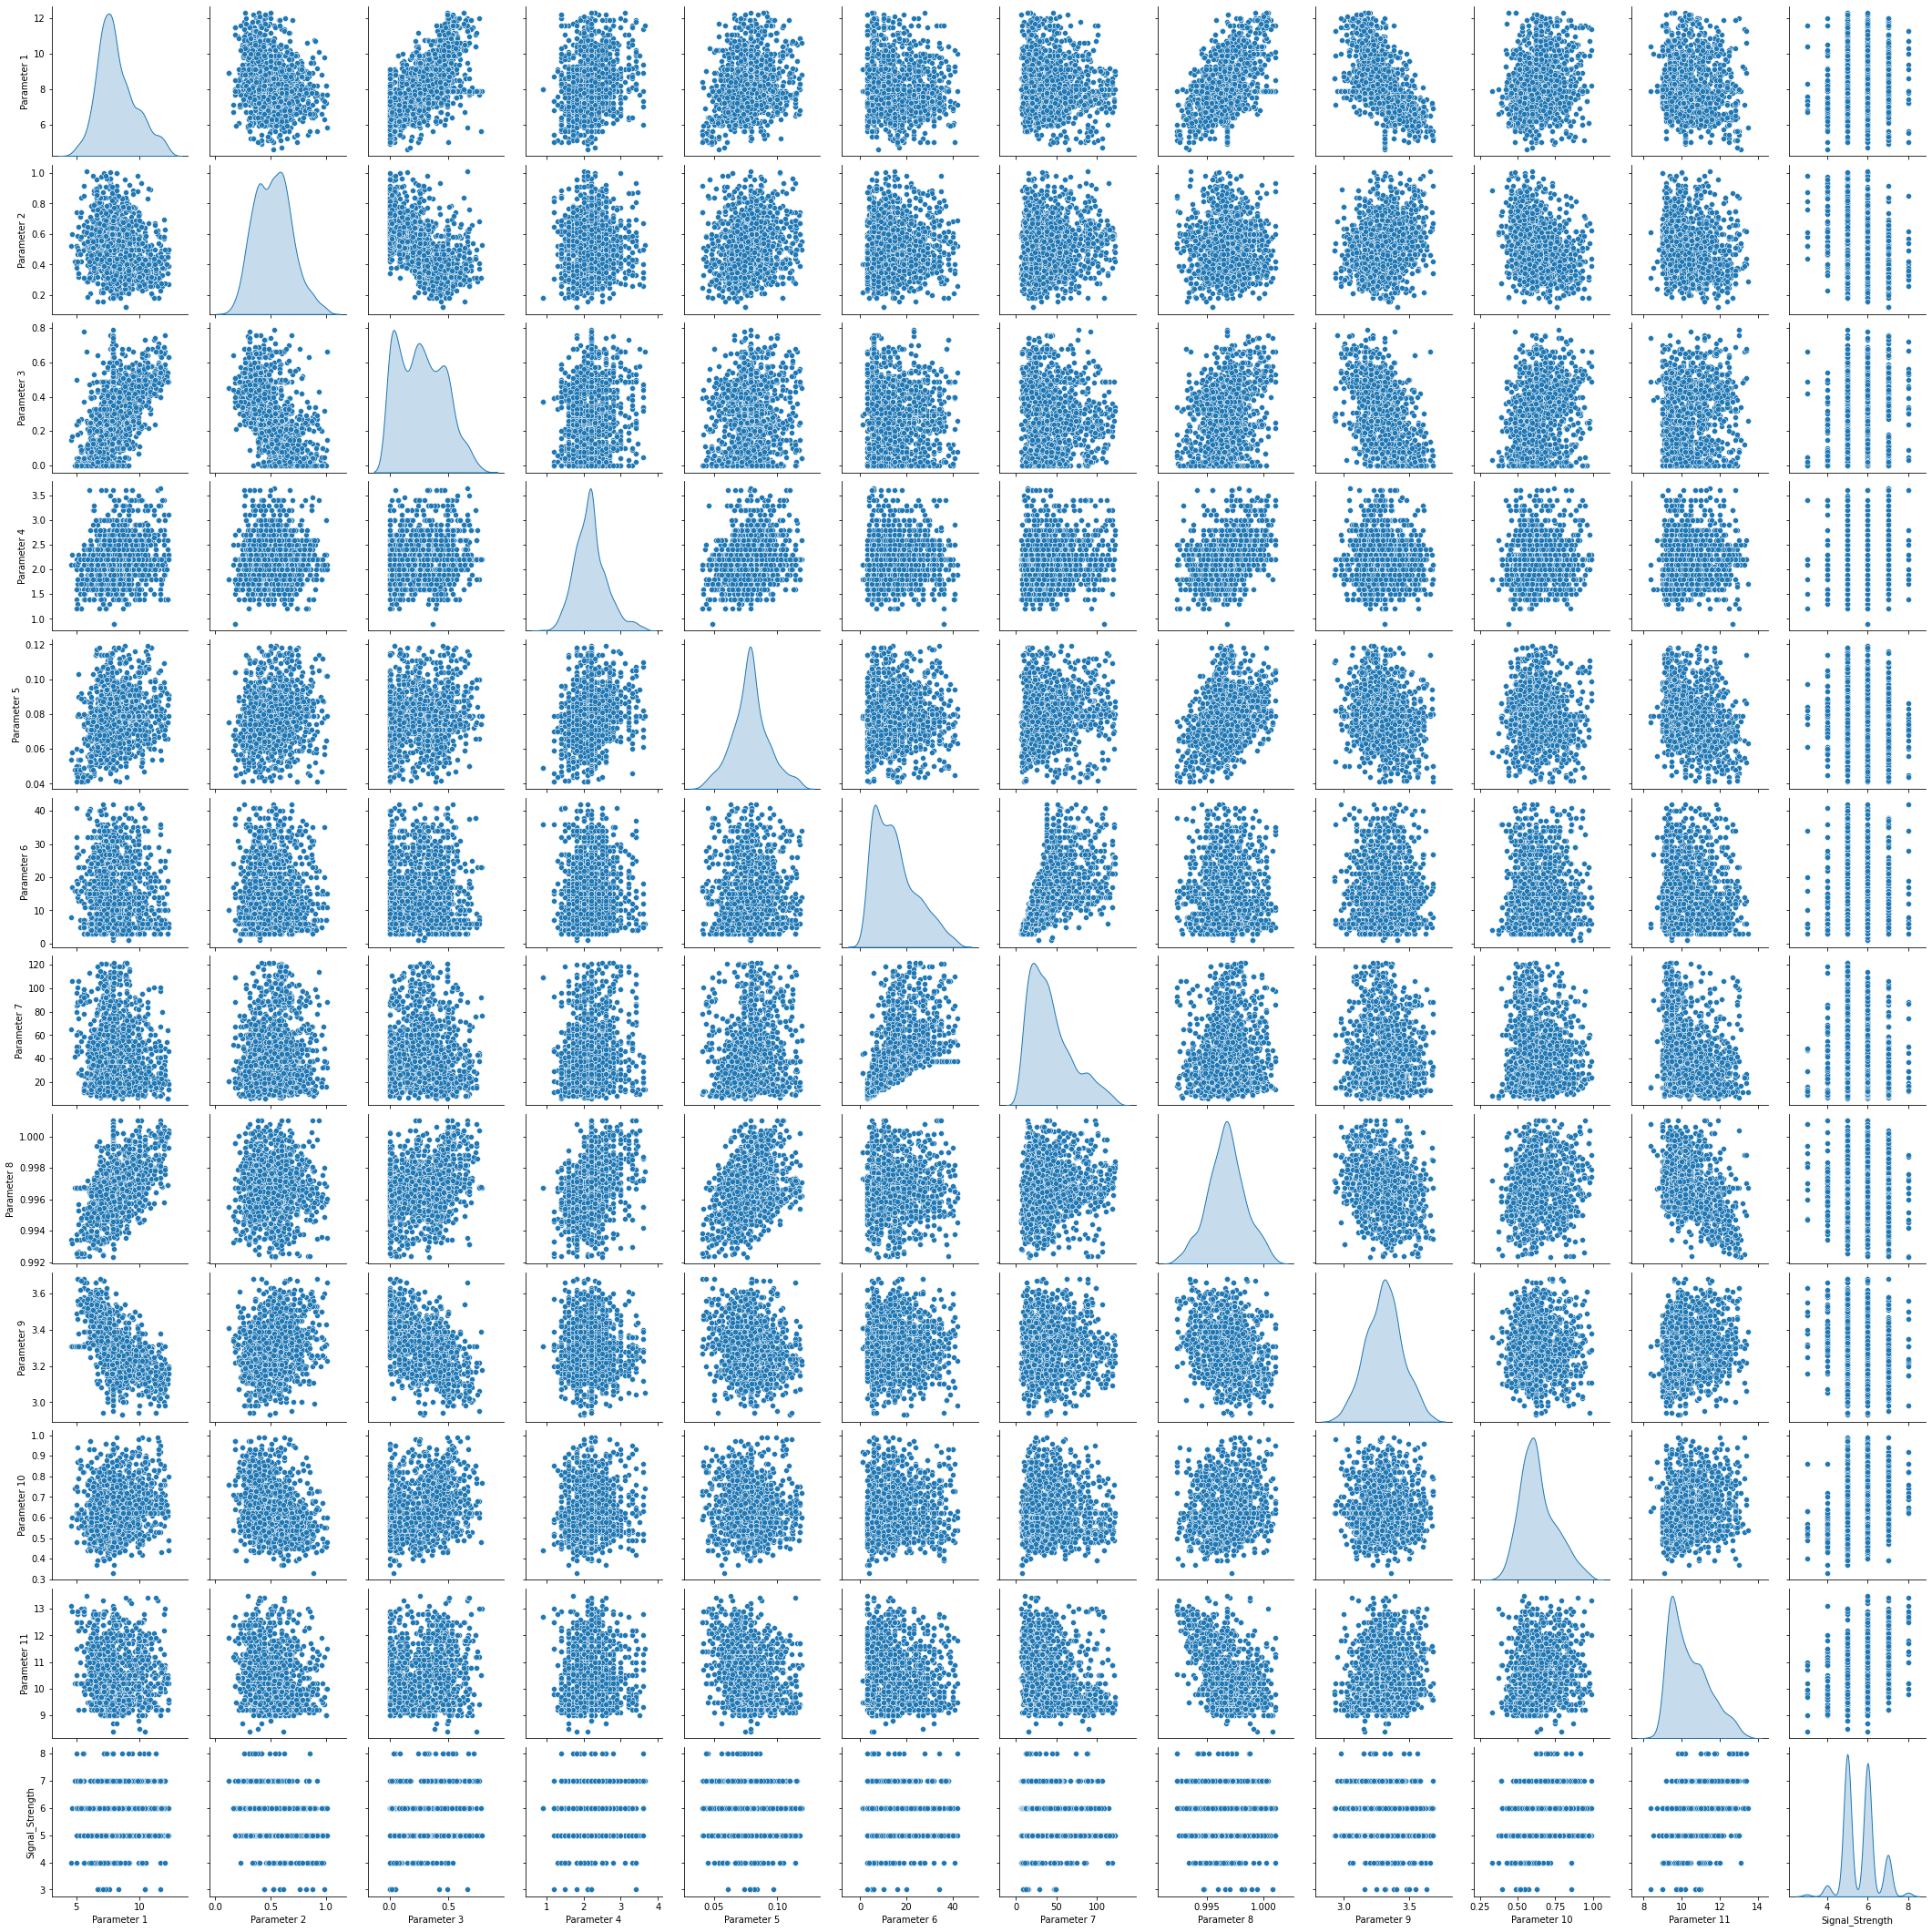

In [11]:
import seaborn as s
s.pairplot(d,diag_kind='kde')

In [12]:
d.corr()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.258476,0.608682,0.225436,0.227814,-0.145813,-0.113789,0.557213,-0.596539,0.176282,-0.048917,0.109637
Parameter 2,-0.258476,1.000000,-0.564257,0.018550,0.138565,0.004853,0.090253,0.000445,0.225681,-0.315552,-0.214283,-0.356247
Parameter 3,0.608682,-0.564257,1.000000,0.156708,0.091785,-0.060658,-0.010996,0.338521,-0.527095,0.277967,0.129530,0.232209
Parameter 4,0.225436,0.018550,0.156708,1.000000,0.229396,0.040756,0.126300,0.372047,-0.064925,0.063026,0.082817,0.035506
Parameter 5,0.227814,0.138565,0.091785,0.229396,1.000000,-0.006299,0.099765,0.375573,-0.184304,-0.059988,-0.260942,-0.162122
Parameter 6,-0.145813,0.004853,-0.060658,0.040756,-0.006299,1.000000,0.596640,-0.018912,0.087431,0.025085,-0.074064,-0.047187
Parameter 7,-0.113789,0.090253,-0.010996,0.126300,0.099765,0.596640,1.000000,0.112545,0.001748,-0.035280,-0.234335,-0.168010
Parameter 8,0.557213,0.000445,0.338521,0.372047,0.375573,-0.018912,0.112545,1.000000,-0.263005,0.120295,-0.472356,-0.164179
Parameter 9,-0.596539,0.225681,-0.527095,-0.064925,-0.184304,0.087431,0.001748,-0.263005,1.000000,-0.021699,0.137582,-0.075837
Parameter 10,0.176282,-0.315552,0.277967,0.063026,-0.059988,0.025085,-0.035280,0.120295,-0.021699,1.000000,0.211820,0.385729


In [13]:
d['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x=d.drop('Signal_Strength',axis=1)
xt,xte,yt,yte=train_test_split(x,d['Signal_Strength'],test_size=.3,random_state=0)
import random
random.seed(0)
import tensorflow.keras as k
m=k.models.Sequential([k.layers.BatchNormalization(input_shape=(11,)),k.layers.Dense(200,activation='relu'),k.layers.Dense(100,activation='relu'),k.layers.Dense(60,activation='relu'),k.layers.Dense(30,activation='relu'),k.layers.Dense(6,activation='softmax')])

In [26]:
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
yt=yt-3
yte=yte-3
yt=k.utils.to_categorical(yt,num_classes=6)
yte=k.utils.to_categorical(yte,num_classes=6)
m.fit(xt,yt,epochs=100,batch_size=64,validation_data=(xte,yte))

Epoch 1/100
18/18 [==============================] - 2s 35ms/step - loss: 1.7235 - accuracy: 0.2603 - val_loss: 1.3130 - val_accuracy: 0.4250
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 1.1837 - accuracy: 0.5352 - val_loss: 3.1559 - val_accuracy: 0.4250
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 1.0500 - accuracy: 0.5731 - val_loss: 2.4916 - val_accuracy: 0.4250
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 0.9946 - accuracy: 0.5824 - val_loss: 2.2164 - val_accuracy: 0.3104
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 0.9626 - accuracy: 0.6070 - val_loss: 2.1786 - val_accuracy: 0.4083
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 0.9628 - accuracy: 0.6060 - val_loss: 1.6569 - val_accuracy: 0.3083
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.9264 - accuracy: 0.6136 - val_loss: 1.4755 - val_accuracy: 0.4104
Epoch 8/100
